In [745]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold

### import the training dataset

In [746]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [747]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [748]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [749]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Explaratory Data Analysis

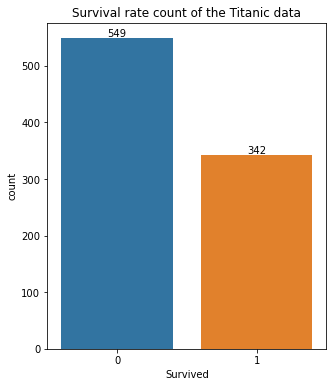

In [750]:
fig = plt.figure(figsize=(5,6))
ax = sb.countplot(x=train_data['Survived'],
                   order=train_data['Survived'].value_counts(ascending=False).index);

abs_values = train_data['Survived'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Survival rate count of the Titanic data');


### Distribution of survivors by passenger class

Text(0.5, 1.0, 'Survival rate count of the Titanic data')

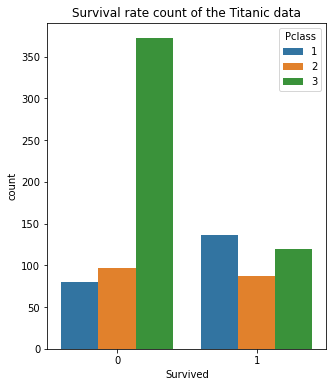

In [751]:
fig = plt.figure(figsize=(5,6))
ax = sb.countplot(data = train_data, x = 'Survived', hue = 'Pclass')

plt.title('Survival rate count of the Titanic data')


### Distribution of survivors by sex

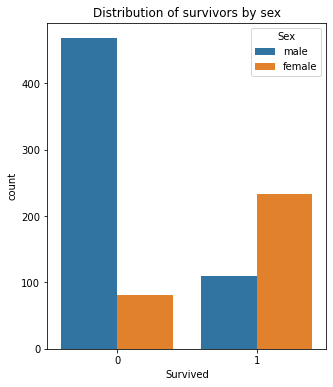

In [752]:
fig = plt.figure(figsize=(5,6))
sb.countplot(data = train_data, x = 'Survived', hue = 'Sex').set(title = 'Distribution of survivors by sex');


### Distribution plot of Age

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


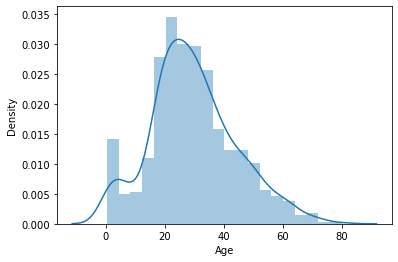

In [753]:
sb.distplot(train_data['Age']);

### Correlation matrix of the train data

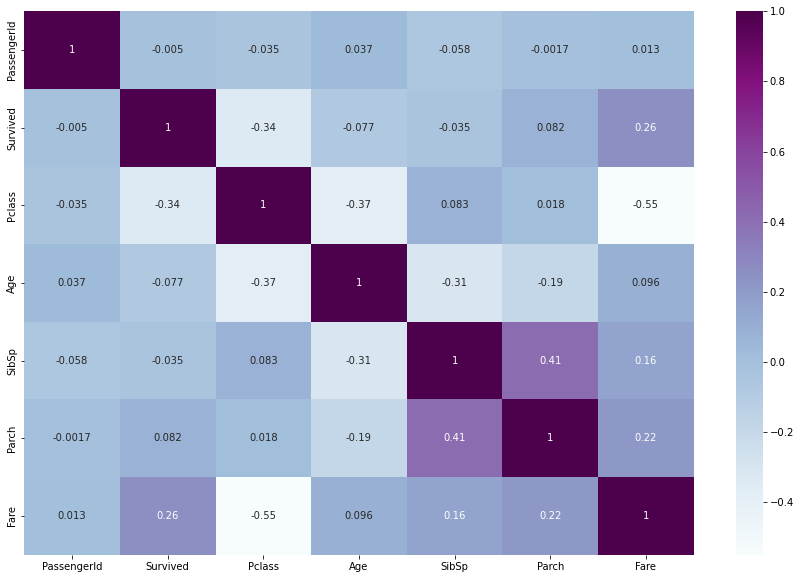

In [754]:
corr = train_data.corr()
plt.figure(figsize = (15,10))
sb.heatmap(corr, annot=True, cmap = 'BuPu');

In [755]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dealing with the missing data

In [756]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [757]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

### Dropping unnecessary columns

In [758]:
cols = ['Name','Ticket','Cabin']
train_data = train_data.drop(columns = cols, axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Applying label encoding for the categorical data

In [759]:
from sklearn.preprocessing import LabelEncoder

In [760]:
cols = ['Sex', 'Embarked']
le = LabelEncoder()
for i in cols:
    train_data[i] = le.fit_transform(train_data[i])

In [761]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [762]:
x_train = train_data.drop(columns = ['Survived'], axis = 1)
y_train = train_data['Survived']

In [763]:
x_train.shape

(891, 8)

In [764]:
y_train.shape

(891,)

### Fitting the training dataset using various models

#### Importing the logistic regression model

In [765]:
from sklearn.linear_model import LogisticRegression

In [766]:
LR = LogisticRegression()

In [767]:
LR.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Importing the Decision Tree model

In [768]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [769]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

#### Importing the random forest algorothm

In [770]:
from sklearn.ensemble import RandomForestClassifier

In [771]:
RFC = RandomForestClassifier()

In [772]:
RFC.fit(x_train, y_train)

RandomForestClassifier()

#### import the naive bayes classifier

In [773]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [774]:
GNB.fit(x_train, y_train)

GaussianNB()

### IMPORTING THE TEST DATA SET 

In [775]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [776]:
data_gender_submission = pd.read_csv('gender_submission.csv')
data_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [777]:
data_gender_submission.shape

(418, 2)

In [778]:
# method 1 using concat for inputting survived column to the dataset

# tested_data = pd.concat([test_data,data_gender_submission],axis='columns')
# tested_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1


In [779]:
# method 2 using merge for inputting survived column to the dataset

# new_test_data = pd.merge(data_gender_submission, test_data, on=['PassengerId'], how='left')
# new_test_data.head()

In [780]:
# Using concat for inputting survived column to the dataset


# test_data = pd.concat([test_data,data_gender_submission],axis='columns')
# test_data.head()

In [781]:
# Using merge for inputting survived column to the dataset

test_data = pd.merge(data_gender_submission, test_data, on=['PassengerId'], how='left')
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [782]:
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [783]:
cols = ['Name','Ticket','Cabin']
test_data = test_data.drop(columns = cols, axis = 1)
test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [784]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 32.7+ KB


#### dealing with the missing values

In [785]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [786]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 32.7+ KB


In [787]:
cols = ['Sex', 'Embarked','Pclass']
le = LabelEncoder()
for i in cols:
    test_data[i] = le.fit_transform(test_data[i])

In [788]:
test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,2,1,34.5,0,0,7.8292,1
1,893,1,2,0,47.0,1,0,7.0000,2
2,894,0,1,1,62.0,0,0,9.6875,1
3,895,0,2,1,27.0,0,0,8.6625,2
4,896,1,2,0,22.0,1,1,12.2875,2


In [789]:
test_data.shape

(418, 9)

In [790]:
x_test = test_data.drop(columns = ['Survived'], axis = 1)
y_test = test_data['Survived']

In [791]:
x_test.shape

(418, 8)

In [792]:
y_test.shape

(418,)

#### Predicting the test data using the Logistic Regression model

In [793]:
LR = LogisticRegression()
LR.fit(x_train, y_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [794]:
# predicting the testing_dataset
LR_pred = LR.predict(x_test)
print(LR_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [825]:
print('The accuracy of logistic regression is:', metrics.accuracy_score(LR_pred, y_test)*100,'%' )
LogReg_score = round(accuracy_score(LR_pred, y_test) * 100, 2)

The accuracy of logistic regression is: 94.73684210526315 %


In [796]:
count = 0
for i in LR_pred:
    if i == 0:
        count += 1
print('The number of Not survivors in the Logistic regression prediction is:', count)        

    

The number of Not survivors in the Logistic regression prediction is: 246


In [797]:
count = 1
for i in LR_pred:
    if i == 1:
        count +=1
print('The number of survivors in the Logistic regression prediction is:', count)

The number of survivors in the Logistic regression prediction is: 173


#### plotting the confusion matrix

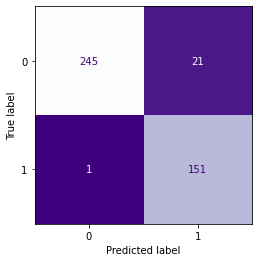

In [798]:
ConfusionMatrixDisplay.from_estimator(LR, x_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

#### Predicting the test data using the Decision Tree model

In [799]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

# predicting the testing_dataset
DTC_pred = DTC.predict(x_test)
print(DTC_pred)

[0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [800]:
print('The accuracy of Decision tree classifer is:', metrics.accuracy_score(DTC_pred, y_test)*100,'%' )
DecTr_score = round(accuracy_score(DTC_pred, y_test) * 100, 2)

The accuracy of Decision tree classifer is: 85.88516746411483 %


In [801]:
count = 0
for i in DTC_pred:
    if i == 0:
        count += 1
print('The number of Not survivors in the Decision tree prediction is:', count)        

    

The number of Not survivors in the Decision tree prediction is: 215


In [802]:
count = 1
for i in DTC_pred:
    if i == 1:
        count +=1
print('The number of survivors in the Decision tree prediction is:', count)

The number of survivors in the Decision tree prediction is: 204


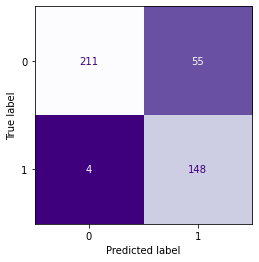

In [803]:
ConfusionMatrixDisplay.from_estimator(DTC, x_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

#### Predicting the test data using the Random Forest model

In [804]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

# predicting the testing_dataset
RFC_pred = RFC.predict(x_test)
print(RFC_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [805]:
print('The accuracy of random forest is:', metrics.accuracy_score(RFC_pred, y_test)*100,'%' )
RanFor_score = round(accuracy_score(RFC_pred, y_test) * 100, 2)

The accuracy of random forest is: 91.38755980861244 %


In [806]:
count = 0
for i in RFC_pred:
    if i == 0:
        count += 1
print('The number of Not survivors in the Randon forest prediction is:', count)        

    

The number of Not survivors in the Randon forest prediction is: 234


In [807]:
count = 1
for i in RFC_pred:
    if i == 1:
        count +=1
print('The number of survivors in the Randon forest prediction is:', count)

The number of survivors in the Randon forest prediction is: 185


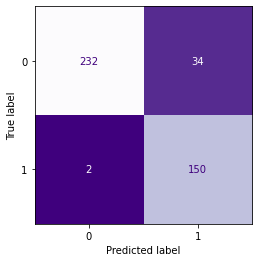

In [808]:
ConfusionMatrixDisplay.from_estimator(RFC, x_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

#### Predicting the test data using the naive bayes classifier

In [809]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# predicting the testing_dataset
GNB_pred = GNB.predict(x_test)
print(GNB_pred)

[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 0]


In [810]:
print('The accuracy of naive bayes is:', metrics.accuracy_score(GNB_pred, y_test)*100,'%' )
GNB_score = round(accuracy_score(GNB_pred, y_test) * 100, 2)

The accuracy of naive bayes is: 82.77511961722487 %


In [811]:
count = 0
for i in GNB_pred:
    if i == 0:
        count += 1
print('The number of Not survivors in the GNB prediction is:', count)        

    

The number of Not survivors in the GNB prediction is: 206


In [812]:
count = 1
for i in GNB_pred:
    if i == 1:
        count +=1
print('The number of survivors in the GNB prediction is:', count)

The number of survivors in the GNB prediction is: 213


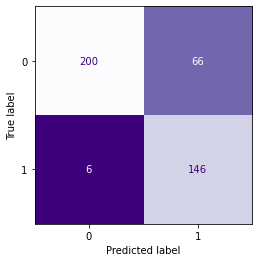

In [813]:
ConfusionMatrixDisplay.from_estimator(GNB, x_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

#### Inserting models and their accuracy scores in table

In [814]:
MODELS = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GaussianNB'],
    'Accuracy Score': [LogReg_score, DecTr_score, RanFor_score, GNB_score]})
MODELS.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
0,Logistic Regression,94.74
2,Random Forest,91.39
1,Decision Tree,85.89
3,GaussianNB,82.78


The above table shows that the Logistic regression model is the best fit for the dataset

In [822]:
PassengerId = test_data['PassengerId']
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived':LR_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [823]:
# save to csv

submission.to_csv('submission.csv')


In [821]:
test_data.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,2,1,34.50000,0,0,7.8292,1
1,893,1,2,0,47.00000,1,0,7.0000,2
2,894,0,1,1,62.00000,0,0,9.6875,1
3,895,0,2,1,27.00000,0,0,8.6625,2
4,896,1,2,0,22.00000,1,1,12.2875,2
5,897,0,2,1,14.00000,0,0,9.2250,2
6,898,1,2,0,30.00000,0,0,7.6292,1
7,899,0,1,1,26.00000,1,1,29.0000,2
8,900,1,2,0,18.00000,0,0,7.2292,0
9,901,0,2,1,21.00000,2,0,24.1500,2
